In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/nimishasingh/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('gurgaon_properties_outlier_treated.csv')

In [4]:
df

property_type                                            society  \
0             flat                            la vida by tata housing   
1             flat                                      m3m woodshire   
2            house                                  vatika india next   
3            house                                        independent   
4             flat                           maxworth city residences   
5             flat                                    kiran residency   
6             flat                                  gls arawali homes   
7             flat                                  mapsko casa bella   
8             flat                               emaar gurgaon greens   
9             flat                     signature global the millennia   
10            flat                             capital residences 360   
11            flat                                        m3m heights   
12            flat                             puri diplomatic greens   
13           house                           unitech uniworld resorts   
14            flat                                        m3m skycity   
15           house                                        independent   
16            flat                                        godrej icon   
17            flat                                        ss the leaf   
18            flat                                     bestech altura   
19            flat                                   smart world gems   
20            flat                                    raheja vedaanta   
21            flat                                      orchid petals   
22           house                                      tata primanti   
23           house                                        independent   
24            flat                            shree vardhman victoria   
25           house                                        independent   
26           house                              vatika sovereign next   
27            flat                            adani m2k oyster grande   
28           house                                        independent   
29            flat                              parsvnath green ville   
30            flat                                ireo the grand arch   
31            flat                                       tulip violet   
32            flat                                        ss the leaf   
33           house                                        independent   
34            flat                            la vida by tata housing   
35            flat                                      m3m woodshire   
36            flat                                      sbtl caladium   
37            flat                              pyramid urban homes 2   
38            flat               shapoorji pallonji joyville gurugram   
39            flat                            suncity platinum towers   
40            flat                                     bestech altura   
41            flat                                             godrej   
42           house                             puri diplomatic greens   
43            flat                                        ats triumph   
44            flat                   emaar mgf emerald floors premier   
45            flat                                         paras dews   
46           house                                        independent   
47           house                               dlf new town heights   
48           house                                               huda   
49            flat                                   puri emerald bay   
50            flat                                   smart world gems   
51            flat                                     dlf the primus   
52            flat                                  satya element one   
53            flat                               shree vardhman

In [5]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1969
carpet_area            1714
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

- First of all fill  built up area column as will carry forward  this column till my last analysis.
We have currently more than 50% missing value but filling these is easy because we have super built up area and carpet area.  And also area column so with help of these 3column will fill built up area column.

#### Society:-
1 row missing 


#### Floor Number:- 
17 rows value missing

#### Facing:-
1011 value missing


#### Age possession:-
We have undefined rows which need to take care.



# Built Up Area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

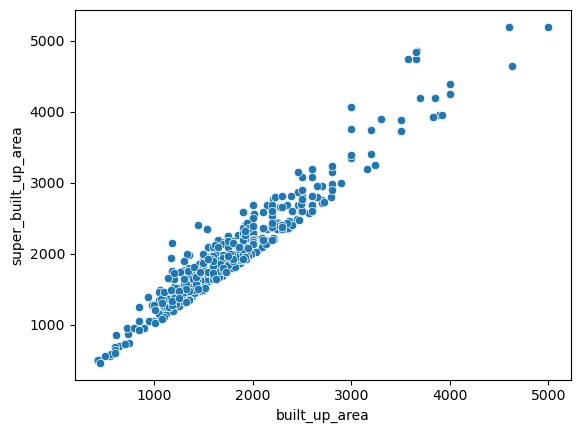

In [10]:
sns.scatterplot(x='built_up_area', y='super_built_up_area', data=df)

- First of all find relationship between built up area and super built up area with help of scatter plot .
- And can see there is strong linear relationship

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

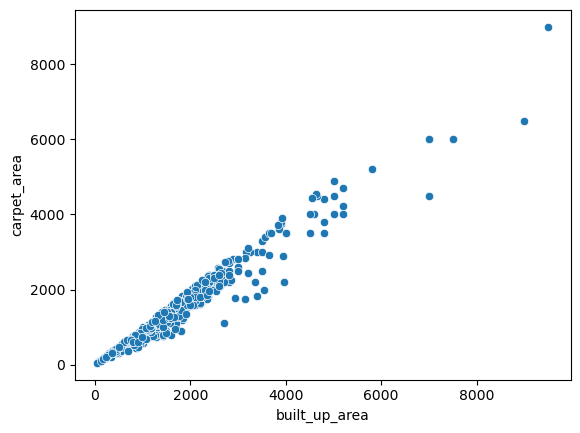

In [11]:
sns.scatterplot(x='built_up_area', y='carpet_area', data=df)

- Again check relationship between built up area and carpet area and found very strong linear relationship.


In [16]:
(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

- Now find out those rows where super built up, built up and carpet area all value missing.


In [19]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull())|(df['carpet_area'].isnull()))]

In [20]:
all_present_df.shape

(531, 24)

- So found n no of rows having where all 3 value absent together, so it’s a good thing for us as it helps to fill all built up area.
- So now extract all those rows where all three features available (super built up , built up and carpet area)


In [21]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/ all_present_df['built_up_area']).median()

In [22]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/ all_present_df['built_up_area']).median()

- Now calculated ratio for super built up area and built up area 
- And also calculate ratio for built up area and carpet area 


In [23]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [24]:
# Both present built up null

sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull())& ~(df['carpet_area'].isnull())]

- Now extracted those rows where super built up and carpet area given but built up area was missing. Because I want to fill those rows where built up area missing.


In [25]:
sbc_df.head()

property_type                         society      sector  price  \
8           flat            emaar gurgaon greens  sector 102   1.35   
9           flat  signature global the millennia  sector 37d   0.60   
17          flat                     ss the leaf   sector 85   1.84   
24          flat         shree vardhman victoria   sector 70   1.10   
49          flat                puri emerald bay  sector 104   2.23   

    price_per_sqft    area                                       areaWithType  \
8           8182.0  1650.0  Super Built up area 1650(153.29 sq.m.)Carpet a...   
9           9231.0   650.0  Super Built up area 650(60.39 sq.m.)Carpet are...   
17          7641.0  2408.0  Super Built up area 2408(223.71 sq.m.)Carpet a...   
24          8462.0  1300.0  Super Built up area 1300(120.77 sq.m.)Carpet a...   
49          9911.0  2250.0  Super Built up area 2450(227.61 sq.m.)Carpet a...   

    bedRoom  bathroom balcony  floorNum      facing   agePossession  \
8         3         3       3       9.0  North-East  Relatively New   
9         2         2       3       7.0         NaN    New Property   
17        3         4       3       8.0  South-East  Relatively New   
24        2         2       2       0.0        West    New Property   
49        3         4      3+      10.0        East  Relatively New   

    super_built_up_area  built_up_area  carpet_area  study room  servant room  \
8                1650.0            NaN      1022.58           0             1   
9                 650.0            NaN       596.12           0             0   
17               2408.0            NaN      1685.00           0             0   
24               1300.0            NaN       788.00           1             0   
49               2450.0            NaN      2250.00           0             1   

    store room  pooja room  others  furnishing_type  luxury_score  \
8            0           0       0                0           100   
9            0           0       0                0            35   
17           0           1       0                0           158   
24           0           0       0                0            49   
49           0           0       0                2           159   

    area_room_ratio  
8        550.000000  
9        325.000000  
17       802.666667  
24       650.000000  
49       750.000000

In [26]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2), inplace=True)

/tmp/ipykernel_70813/3548745466.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2), inplace=True)
/tmp/ipykernel_70813/3548745466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area'].fillna(round(((sbc_df['super

- Logic I use to predict built up area by help of created ( sbc_df ) dataframe.
- I divided super built up area by 1.105 (super_to_built_up_ratio) and added carpet area divided by 0.9 (carpet_to_built_up_ratio)  , these given built up area and then taken average and filled built up area. And update my original dataframe with this new built up area value.


In [27]:
sbc_df

property_type                                       society  \
8             flat                          emaar gurgaon greens   
9             flat                signature global the millennia   
17            flat                                   ss the leaf   
24            flat                       shree vardhman victoria   
49            flat                              puri emerald bay   
51            flat                                dlf the primus   
69            flat                               ambience lagoon   
71            flat                       shree vardhman victoria   
72            flat                   bestech park view sanskruti   
73            flat                        experion the heartsong   
81            flat                            emaar palm gardens   
82            flat                       aipl the peaceful homes   
96            flat                                 ashiana anmol   
109           flat                                 m3m sierra 68   
121           flat                       shree vardhman victoria   
137           flat                            ireo the corridors   
140           flat                             dlf regal gardens   
161           flat                             awho shanti vihar   
170           flat                      bestech park view ananda   
179           flat                                suncity avenue   
186           flat                                dlf the primus   
201           flat              hsiidc sidco shivalik apartments   
209           flat                                   bhawna cghs   
220           flat              emaar mgf emerald floors premier   
221           flat                            imperia the esfera   
232           flat                                   ss the leaf   
235           flat                           smart world orchard   
244           flat                            umang winter hills   
245           flat                            emaar palm gardens   
246           flat                                 pioneer araya   
247           flat          shapoorji pallonji joyville gurugram   
257           flat                                    bptp terra   
259           flat                   ansal housing highland park   
260           flat                         alpha corp gurgaonone   
262           flat                                   zara aavaas   
266           flat                               eldeco accolade   
270           flat                                pivotal devaan   
271           flat                          emaar gurgaon greens   
292           flat          shapoorji pallonji joyville gurugram   
306           flat                       shree vardhman victoria   
312           flat                            mapsko mount ville   
320           flat                      bestech park view ananda   
321           flat                            imperia the esfera   
322           flat                             chintels paradiso   
325           flat                          emaar gurgaon greens   
333           flat                              puri emerald bay   
338           flat          shapoorji pallonji joyville gurugram   
340           flat                          emaar gurgaon greens   
342           flat                         alpha corp gurgaonone   
353           flat                       shree vardhman victoria   
393           flat                             mapsko casa bella   
411           flat                       indiabulls centrum park   
413           flat                       shree vardhman victoria   
423           flat                      bestech park view ananda   
424           flat                               eldeco accolade   
433           flat                                 m3m soulitude   
434           flat                                   godrej aria   
453           flat                                   ats triu

In [28]:
df.update(sbc_df)

/tmp/ipykernel_70813/3129191992.py:1: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.update(sbc_df)
/tmp/ipykernel_70813/3129191992.py:1: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.update(sbc_df)
/tmp/ipykernel_70813/3129191992.py:1: FutureWarning: Downcasting behavior in Series and Data

In [29]:
df.head()

property_type                   society      sector  price  price_per_sqft  \
0          flat   la vida by tata housing  sector 113   3.05         15561.0   
1          flat             m3m woodshire  sector 107   0.88          6442.0   
2         house         vatika india next   sector 82   7.00         21605.0   
3         house               independent   sector 12   1.40          8701.0   
4          flat  maxworth city residences  sector 10a   0.90          7081.0   

     area                                       areaWithType  bedRoom  \
0  1960.0  Super Built up area 2690(249.91 sq.m.)Built Up...        3   
1  1366.0             Super Built up area 1366(126.91 sq.m.)        2   
2  3240.0  Plot area 360(33.45 sq.m.)Built Up area: 3900 ...        4   
3  1609.0                         Plot area 166(138.8 sq.m.)        2   
4  1271.0             Super Built up area 1200(111.48 sq.m.)        2   

   bathroom balcony  floorNum      facing   agePossession  \
0         4       3       3.0  North-West  Relatively New   
1         2      3+       3.0        East  Relatively New   
2         4      3+       3.0  North-East  Relatively New   
3         2       1       2.0  North-East    Old Property   
4         2       3       9.0        East    New Property   

   super_built_up_area  built_up_area  carpet_area  study room  servant room  \
0               2690.0         2150.0       1960.0           0             1   
1               1366.0            NaN          NaN           0             0   
2                  NaN         3900.0       3743.0           0             1   
3                  NaN          166.0          NaN           0             0   
4               1200.0            NaN          NaN           0             0   

   store room  pooja room  others  furnishing_type  luxury_score  \
0           0           0       0                0           174   
1           0           0       0                0            99   
2           0           0       0                1           105   
3           0           0       0                0             0   
4           0           0       1                0            52   

   area_room_ratio  
0       653.333333  
1       683.000000  
2       810.000000  
3       804.500000  
4       635.500000

In [30]:
df['built_up_area'].isnull().sum()

1548

- Explored the relationship between built-up area and super built-up area through a scatter plot, revealing a strong linear correlation.
- Similarly, investigated the correlation between built-up area and carpet area, identifying a very strong linear relationship
- Checked for rows where all three features(super built up, built-up and carpet area)had mssing values.
- Fortunately, found no rows with all three values absent simultaneously.
- Extracted rows where all three features were available(super built-up, built-up, and carpet area)
- Calculated the ratio between super built up area and built-up area, as well as the ratio between built-up area and carpet area.
- Identified rows where super built-up and carpet area were given, but built up area was misisng.
- Developed a logic to predict built-up area using the created dataframe(sbc_df), dividing super built-up area by 1.105 (super_to_built_up_ratio) and adding carpet area divided by 0.9 (carpet_to_built_up_ratio).Calulated the average and filled in the missing built-up area values.
- Initiated with 1969 missing built-up areas values and, after applying the filling logic, reduced the count to 1548.
- Thus, 421 rows were successfully filled using this approach.

In [31]:
# super built up present and carpet area is null , built up null

sb_df= df[~(df['super_built_up_area'].isnull())& (df['built_up_area'].isnull())& (df['carpet_area'].isnull())]

- Now done further analysis and find those rows where super built up area present and carpet area and built up area is null
- So that now with help of super built up area will fill built up area.



In [32]:
sb_df.head()

property_type                   society      sector  price  price_per_sqft  \
1           flat             m3m woodshire  sector 107   0.88          6442.0   
4           flat  maxworth city residences  sector 10a   0.90          7081.0   
7           flat         mapsko casa bella   sector 82   1.30          6379.0   
12          flat    puri diplomatic greens  sector 111   2.58         11727.0   
14          flat               m3m skycity   sector 65   2.10         16031.0   

      area                            areaWithType  bedRoom  bathroom balcony  \
1   1366.0  Super Built up area 1366(126.91 sq.m.)        2         2      3+   
4   1271.0  Super Built up area 1200(111.48 sq.m.)        2         2       3   
7   2038.0  Super Built up area 1960(182.09 sq.m.)        4         4      3+   
12  2200.0  Super Built up area 2200(204.39 sq.m.)        3         4       2   
14  1310.0   Super Built up area 1310(121.7 sq.m.)        2         2       2   

    floorNum facing   agePossession  super_built_up_area  built_up_area  \
1        3.0   East  Relatively New               1366.0            NaN   
4        9.0   East    New Property               1200.0            NaN   
7        1.0  North  Relatively New               1960.0            NaN   
12      10.0  North  Moderately Old               2200.0            NaN   
14      43.0    NaN    New Property               1310.0            NaN   

    carpet_area  study room  servant room  store room  pooja room  others  \
1           NaN           0             0           0           0       0   
4           NaN           0             0           0           0       1   
7           NaN           0             1           0           0       0   
12          NaN           0             1           0           0       0   
14          NaN           0             0           0           0       0   

    furnishing_type  luxury_score  area_room_ratio  
1                 0            99       683.000000  
4                 0            52       635.500000  
7                 0           130       509.500000  
12                0            86       733.333333  
14                0           127       655.000000

In [33]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105), inplace=True)

/tmp/ipykernel_70813/1215299602.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105), inplace=True)
/tmp/ipykernel_70813/1215299602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105), inplace=True)



- Divided super built up area with 1.105 (super_to_built_up_ratio) and fill in built up area
- Now again updated original dataframe.


In [34]:
sb_df

property_type                                       society  \
1             flat                                 m3m woodshire   
4             flat                      maxworth city residences   
7             flat                             mapsko casa bella   
12            flat                        puri diplomatic greens   
14            flat                                   m3m skycity   
16            flat                                   godrej icon   
20            flat                               raheja vedaanta   
27            flat                       adani m2k oyster grande   
32            flat                                   ss the leaf   
36            flat                                 sbtl caladium   
41            flat                                        godrej   
44            flat              emaar mgf emerald floors premier   
50            flat                              smart world gems   
53            flat                          shree vardhman flora   
54            flat                               eldeco accolade   
59            flat                                    sobha city   
60            flat                                    sobha city   
61            flat                                   m3m heights   
63            flat                            ireo the corridors   
64            flat                                 orchid petals   
67            flat                                    sobha city   
68            flat                                ats tourmaline   
70            flat                       la vida by tata housing   
74            flat                    ansal api celebrity suites   
77            flat                                        godrej   
78            flat                                   ats triumph   
85            flat          shapoorji pallonji joyville gurugram   
93            flat                       adani m2k oyster grande   
94            flat                              ansal heights 86   
101           flat                                  ats marigold   
103           flat                                rose apartment   
108           flat                              dlf the skycourt   
112           flat                   godrej nature plus serenity   
114           flat                   ansal housing highland park   
116           flat                        tashee capital gateway   
117           flat                                   m3m capital   
123           flat                                dlf the ultima   
125           flat                                ats tourmaline   
133           flat                          shree vardhman flora   
135           flat                   bestech park view residency   
139           flat                    dnha group housing society   
145           flat                                    chd avenue   
148           flat                              dlf the skycourt   
153           flat                      signature global city 92   
154           flat                                avl 36 gurgaon   
157           flat                              antriksh heights   
164           flat                                   ats triumph   
165           flat                signature global the millennia   
168           flat                             ansal api esencia   
173           flat                             vatika city homes   
182           flat                                    bptp terra   
188           flat                             suncity avenue 76   
189           flat                               ramprastha city   
190           flat                                assotech blith   
191           flat                       shree vardhman victoria   
195           flat                          sidhartha ncr greens   
199           flat                      emaar mgf emerald estate   
200           flat                                   godrej a

In [35]:
sb_df.isnull().sum()
# all built up area filled 

property_type            0
society                  0
sector                   0
price                    0
price_per_sqft           0
area                     0
areaWithType             0
bedRoom                  0
bathroom                 0
balcony                  0
floorNum                 0
facing                 241
agePossession            0
super_built_up_area      0
built_up_area            0
carpet_area            875
study room               0
servant room             0
store room               0
pooja room               0
others                   0
furnishing_type          0
luxury_score             0
area_room_ratio          0
dtype: int64

In [36]:
df.update(sb_df)

/tmp/ipykernel_70813/273999481.py:1: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.update(sb_df)
/tmp/ipykernel_70813/273999481.py:1: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.update(sb_df)
/tmp/ipykernel_70813/273999481.py:1: FutureWarning: Downcasting behavior in Series and DataFrame

In [37]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area           673
carpet_area            1714
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [38]:
sb_df.shape

(875, 24)

- Conducted additional analysis to identify rows with super built up area values while both carpet area and built up area
 were null.
- Utillized the available super built-up area values to fill in the missing built-up area.
- Applied the formula of dividing super built-up area by 1.105 (super_to_built_up_ratio) to estimate and fill in the built- up area values.
- Updated the original dataframe with the newly filled built up area values.
- Following this process, there were 673 remaining missing values for the built up area feature.
- Successfully filled these 673 rows, reducing the count from the previous filled rows (1548) by applying the same process.
- Consequently, 875 rows were filled in this iteration.

In [39]:
# super built up , built up is null and carpet area is present 

c_df= df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]


- Now for further analysis again created dataframe where super built up area and built up area is null but carpet area is presented so with help of carpet to built up ratio will divide the carpet area and fill built up area.


In [40]:
c_df.head()

property_type              society      sector  price  price_per_sqft  \
6           flat    gls arawali homes  sohna road   0.29          6029.0   
11          flat          m3m heights   sector 65   2.86         13999.0   
19          flat     smart world gems   sector 89   0.95          8597.0   
21          flat        orchid petals   sector 49   1.90         10526.0   
30          flat  ireo the grand arch   sector 58   2.20         16000.0   

      area                       areaWithType  bedRoom  bathroom balcony  \
6    481.0  Carpet area: 480.53 (44.64 sq.m.)        2         2       2   
11  2043.0   Carpet area: 2040 (189.52 sq.m.)        3         3       3   
19  1105.0   Carpet area: 1103 (102.47 sq.m.)        2         2       2   
21  1805.0   Carpet area: 1805 (167.69 sq.m.)        3         3       3   
30  1375.0   Carpet area: 1375 (127.74 sq.m.)        2         2       1   

    floorNum      facing       agePossession  super_built_up_area  \
6        9.0        East      Relatively New                  NaN   
11      45.0        East  Under Construction                  NaN   
19       4.0         NaN        New Property                  NaN   
21       9.0  North-West      Moderately Old                  NaN   
30       5.0        East      Relatively New                  NaN   

    built_up_area  carpet_area  study room  servant room  store room  \
6             NaN   480.500496           0             0           0   
11            NaN  2040.000000           0             1           0   
19            NaN  1103.000000           1             1           0   
21            NaN  1805.000000           0             1           0   
30            NaN  1375.000000           0             0           0   

    pooja room  others  furnishing_type  luxury_score  area_room_ratio  
6            0       0                0            55       240.500000  
11           0       0                0            48       681.000000  
19           0       0                0            38       552.500000  
21           0       0                2            95       601.666667  
30           1       0                2            49       687.500000

In [41]:
c_df.shape

(673, 24)

In [43]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9), inplace=True)

/tmp/ipykernel_70813/3473321853.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9), inplace=True)
/tmp/ipykernel_70813/3473321853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9), inplace=True)


In [44]:
c_df.head()

property_type              society      sector  price  price_per_sqft  \
6           flat    gls arawali homes  sohna road   0.29          6029.0   
11          flat          m3m heights   sector 65   2.86         13999.0   
19          flat     smart world gems   sector 89   0.95          8597.0   
21          flat        orchid petals   sector 49   1.90         10526.0   
30          flat  ireo the grand arch   sector 58   2.20         16000.0   

      area                       areaWithType  bedRoom  bathroom balcony  \
6    481.0  Carpet area: 480.53 (44.64 sq.m.)        2         2       2   
11  2043.0   Carpet area: 2040 (189.52 sq.m.)        3         3       3   
19  1105.0   Carpet area: 1103 (102.47 sq.m.)        2         2       2   
21  1805.0   Carpet area: 1805 (167.69 sq.m.)        3         3       3   
30  1375.0   Carpet area: 1375 (127.74 sq.m.)        2         2       1   

    floorNum      facing       agePossession  super_built_up_area  \
6        9.0        East      Relatively New                  NaN   
11      45.0        East  Under Construction                  NaN   
19       4.0         NaN        New Property                  NaN   
21       9.0  North-West      Moderately Old                  NaN   
30       5.0        East      Relatively New                  NaN   

    built_up_area  carpet_area  study room  servant room  store room  \
6           534.0   480.500496           0             0           0   
11         2267.0  2040.000000           0             1           0   
19         1226.0  1103.000000           1             1           0   
21         2006.0  1805.000000           0             1           0   
30         1528.0  1375.000000           0             0           0   

    pooja room  others  furnishing_type  luxury_score  area_room_ratio  
6            0       0                0            55       240.500000  
11           0       0                0            48       681.000000  
19           0       0                0            38       552.500000  
21           0       0                2            95       601.666667  
30           1       0                2            49       687.500000

In [45]:
c_df.isnull().sum()

property_type            0
society                  0
sector                   0
price                    0
price_per_sqft           0
area                     0
areaWithType             0
bedRoom                  0
bathroom                 0
balcony                  0
floorNum                 0
facing                 289
agePossession            0
super_built_up_area    673
built_up_area            0
carpet_area              0
study room               0
servant room             0
store room               0
pooja room               0
others                   0
furnishing_type          0
luxury_score             0
area_room_ratio          0
dtype: int64

In [46]:
df.update(c_df)

/tmp/ipykernel_70813/108363553.py:1: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.update(c_df)
/tmp/ipykernel_70813/108363553.py:1: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.update(c_df)
/tmp/ipykernel_70813/108363553.py:1: FutureWarning: Downcasting behavior in Series and DataFrame m

In [47]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area             0
carpet_area            1714
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

- Created a new dataframe (c_df) focusing on rows where both super built-up area and built-up area were null, but carpet area was available.

- Utilized the carpet to built-up area ratio to calculate and fill in the missing built-up area values in the c_df dataframe.

- Updated the original dataframe with the c_df dataframe, specifically filling in the built-up area for the identified rows.

- Resolved the missing values in the built-up area feature, resulting in a count of "0" remaining missing values in this category.

<Axes: xlabel='built_up_area', ylabel='price'>

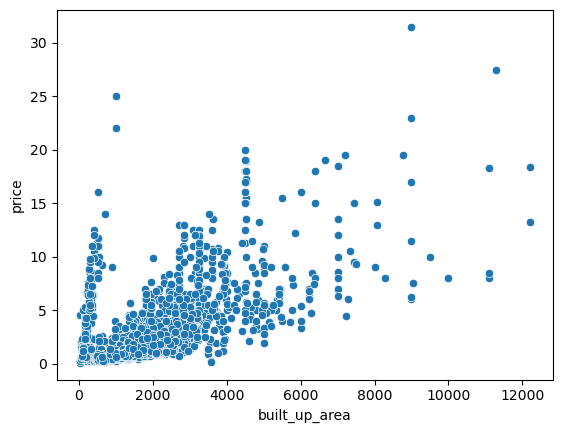

In [49]:
sns.scatterplot(x='built_up_area', y='price', data=df)

- Now plot a scatter plot between built up area and price. As well as area increasing price also increasing.
- Also found some anomalies where area is less but price is around 20-25 crores.


In [50]:
anamoly_df = df[(df['built_up_area']< 2000)& (df['price'] >2.5)][['price', 'area', 'built_up_area']]


- So created anomalies datframe and find where area is less than 2000 and prices are greater than 2.5 crore.


In [51]:
anamoly_df

price    area  built_up_area
12     2.58  2200.0        1991.00
15     3.10  1548.0        1548.00
23     6.50  1800.0        1800.00
25     9.50  4050.0         500.00
33     3.60  1728.0        1728.00
46     3.49  1728.0        1728.00
48     3.50  1458.0         161.00
59     2.60  1711.0        1548.00
61     3.29  1828.0        1654.00
79     9.50  4914.0         546.00
89     3.80  2164.0        1700.00
119    2.90  1557.0        1415.00
122    2.80  1650.0        1800.00
132    8.70  2250.0         267.00
163   14.00  6300.0         700.00
172    4.25  1350.0         161.00
185    8.00  3132.0         387.00
194    2.80  2441.0        1939.03
197    2.85  1975.0        1800.00
210    2.95  2003.0        1600.00
215    2.80  1800.0        1900.00
220    2.55  1650.0        1469.00
226    2.60  1080.0        1080.00
240    4.20  2125.0        1946.00
243    5.75  2329.0        1900.00
249    3.67  2040.0        1846.00
280    3.50  1350.0        1500.00
287    3.40  2185.0        1977.00
296    4.25  1620.0        1620.00
308    5.25  1935.0        1935.00
313    3.50  1620.0        1620.00
323    2.80  1828.0        1828.00
327    2.65  1582.0         138.00
330    2.57  1630.0        1811.00
343    4.00  2025.0         225.00
348    2.60  1766.0        1475.00
369    6.60  1800.0        1800.00
395   11.30  4500.0         480.00
396    4.45  1350.0        1350.00
405    3.00  2047.0        1900.00
410    2.65  2251.0        1750.75
426    8.25  2160.0         300.00
427    4.00  8829.0         981.00
429    5.30  1935.0        1935.00
474    6.75  2088.0         232.00
491    2.98  1449.0        1449.00
499    3.90  1174.0        1389.00
504    2.55  2273.0        1773.00
510    3.90  1836.0        1836.00
525    7.50  2160.0         241.00
554    7.60  1961.0        1935.00
608    9.25  5580.0         630.00
609    3.65  2395.0        1869.00
625    3.00  1950.0        1720.00
632    8.45  3231.0         359.00
633    4.60  1728.0        1728.00
663    5.50  1800.0        1800.00
666    7.10  2160.0         239.00
670    5.10  3078.0         125.00
701    2.60  1650.0        1833.00
710    3.00  1642.0        1642.00
722    4.50  1350.0        1350.00
725    3.60  1449.0        1449.00
731    3.60  1836.0        1836.00
732    6.50  1935.0        1935.00
738    8.80  2115.0         267.00
739    3.00  1975.0        1787.00
812    3.15  1548.0        1548.00
814    3.15  2153.0         222.00
818    9.00  8100.0         900.00
820    9.50  2250.0         300.00
837    3.23  1202.0        1640.00
849    4.50  3150.0          14.00
851   10.50  3618.0         402.00
864    3.50  1350.0        1350.00
867    2.65  1650.0        1833.00
872    8.00  3123.0         347.00
873    4.00  1836.0        1836.00
911    2.95  1449.0        1000.00
956    2.90  1975.0        1787.00
963    3.50  1449.0        1449.00
965    5.50  1800.0        1800.00
977    3.00  1557.0        1557.00
982    7.10  2259.0         240.00
997    4.70  2368.0         170.00
1062   3.75  1701.0        1701.00
1076   2.75  1080.0        1080.00
1078   3.45  1869.0        1869.00
1079   5.15  3660.0         340.00
1088   2.64  2252.0        1750.75
1091   2.54  1639.0        1822.00
1113   7.25  2471.0         303.00
1116   2.80  1650.0        1493.00
1136   6.50  1836.0         215.00
1143   2.51  2093.0        1894.00
1154   2.75  1386.0        1833.00
1164   6.46  3420.0         380.00
1171   4.85  1607.0        1785.00
1187   3.00  2100.0        1900.00
1216   4.86  1875.0        1697.00
1225   6.80  2160.0         220.00
1230   3.87  2250.0        1712.00
1233   3.75  1620.0         333.00
1242   4.35  1836.0        1836.00
1249   4.50  1350.0         160.00
1255   2.90  2047.0        1852.00
1258   2.99  1449.0        1449.00
1303   6.25  1800.0        1800.00
1312   2.60  4986.0         616.00
1318   6.40  2700.0         366.00
1330   2.70  2159.0        1954.00
1334   2.69  2152.0        1946.00
1360   5.80  1800.0        1800.00
1364   3.71  187

By looking at anamoly_df its identified by given area feature price is justified but built up area is not justifing the price so I filled up built up area with area 

In [52]:
anamoly_df.shape

(275, 3)

In [53]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [54]:
anamoly_df

price    area  built_up_area
12     2.58  2200.0         2200.0
15     3.10  1548.0         1548.0
23     6.50  1800.0         1800.0
25     9.50  4050.0         4050.0
33     3.60  1728.0         1728.0
46     3.49  1728.0         1728.0
48     3.50  1458.0         1458.0
59     2.60  1711.0         1711.0
61     3.29  1828.0         1828.0
79     9.50  4914.0         4914.0
89     3.80  2164.0         2164.0
119    2.90  1557.0         1557.0
122    2.80  1650.0         1650.0
132    8.70  2250.0         2250.0
163   14.00  6300.0         6300.0
172    4.25  1350.0         1350.0
185    8.00  3132.0         3132.0
194    2.80  2441.0         2441.0
197    2.85  1975.0         1975.0
210    2.95  2003.0         2003.0
215    2.80  1800.0         1800.0
220    2.55  1650.0         1650.0
226    2.60  1080.0         1080.0
240    4.20  2125.0         2125.0
243    5.75  2329.0         2329.0
249    3.67  2040.0         2040.0
280    3.50  1350.0         1350.0
287    3.40  2185.0         2185.0
296    4.25  1620.0         1620.0
308    5.25  1935.0         1935.0
313    3.50  1620.0         1620.0
323    2.80  1828.0         1828.0
327    2.65  1582.0         1582.0
330    2.57  1630.0         1630.0
343    4.00  2025.0         2025.0
348    2.60  1766.0         1766.0
369    6.60  1800.0         1800.0
395   11.30  4500.0         4500.0
396    4.45  1350.0         1350.0
405    3.00  2047.0         2047.0
410    2.65  2251.0         2251.0
426    8.25  2160.0         2160.0
427    4.00  8829.0         8829.0
429    5.30  1935.0         1935.0
474    6.75  2088.0         2088.0
491    2.98  1449.0         1449.0
499    3.90  1174.0         1174.0
504    2.55  2273.0         2273.0
510    3.90  1836.0         1836.0
525    7.50  2160.0         2160.0
554    7.60  1961.0         1961.0
608    9.25  5580.0         5580.0
609    3.65  2395.0         2395.0
625    3.00  1950.0         1950.0
632    8.45  3231.0         3231.0
633    4.60  1728.0         1728.0
663    5.50  1800.0         1800.0
666    7.10  2160.0         2160.0
670    5.10  3078.0         3078.0
701    2.60  1650.0         1650.0
710    3.00  1642.0         1642.0
722    4.50  1350.0         1350.0
725    3.60  1449.0         1449.0
731    3.60  1836.0         1836.0
732    6.50  1935.0         1935.0
738    8.80  2115.0         2115.0
739    3.00  1975.0         1975.0
812    3.15  1548.0         1548.0
814    3.15  2153.0         2153.0
818    9.00  8100.0         8100.0
820    9.50  2250.0         2250.0
837    3.23  1202.0         1202.0
849    4.50  3150.0         3150.0
851   10.50  3618.0         3618.0
864    3.50  1350.0         1350.0
867    2.65  1650.0         1650.0
872    8.00  3123.0         3123.0
873    4.00  1836.0         1836.0
911    2.95  1449.0         1449.0
956    2.90  1975.0         1975.0
963    3.50  1449.0         1449.0
965    5.50  1800.0         1800.0
977    3.00  1557.0         1557.0
982    7.10  2259.0         2259.0
997    4.70  2368.0         2368.0
1062   3.75  1701.0         1701.0
1076   2.75  1080.0         1080.0
1078   3.45  1869.0         1869.0
1079   5.15  3660.0         3660.0
1088   2.64  2252.0         2252.0
1091   2.54  1639.0         1639.0
1113   7.25  2471.0         2471.0
1116   2.80  1650.0         1650.0
1136   6.50  1836.0         1836.0
1143   2.51  2093.0         2093.0
1154   2.75  1386.0         1386.0
1164   6.46  3420.0         3420.0
1171   4.85  1607.0         1607.0
1187   3.00  2100.0         2100.0
1216   4.86  1875.0         1875.0
1225   6.80  2160.0         2160.0
1230   3.87  2250.0         2250.0
1233   3.75  1620.0         1620.0
1242   4.35  1836.0         1836.0
1249   4.50  1350.0         1350.0
1255   2.90  2047.0         2047.0
1258   2.99  1449.0         1449.0
1303   6.25  1800.0         1800.0
1312   2.60  4986.0         4986.0
1318   6.40  2700.0         2700.0
1330   2.70  2159.0         2159.0
1334   2.69  2152.0         2152.0
1360   5.80  1800.0         1800.0
1364   3.71  187

In [55]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

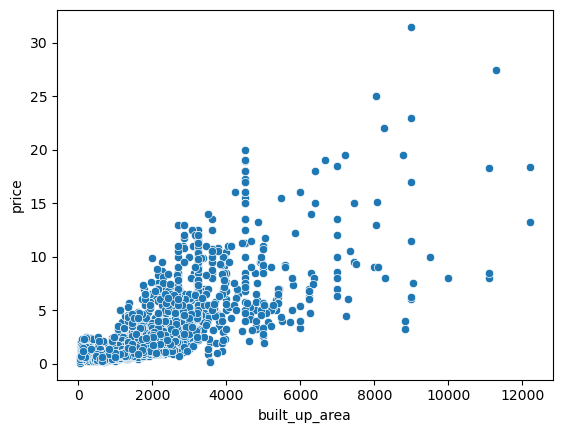

In [56]:
sns.scatterplot(x='built_up_area', y='price', data=df)

- Generated a scatter plot to visualize the relationship between built-up area and price, observing a general trend of increasing prices with larger areas.

- Identified anomalies by creating an anomalies dataframe, focusing on properties with areas less than 2000 square feet and prices exceeding 2.5 crores.

- Addressed the identified anomalies by filling in the built-up area with the corresponding area value.

- Updated the original dataframe with the corrected values, eliminating the anomalies.

- Re-examined the relationship between price and built-up area to confirm the removal of anomalies and ensure a more justified correlation.

In [57]:
df.head()

property_type                   society      sector  price  price_per_sqft  \
0          flat   la vida by tata housing  sector 113   3.05         15561.0   
1          flat             m3m woodshire  sector 107   0.88          6442.0   
2         house         vatika india next   sector 82   7.00         21605.0   
3         house               independent   sector 12   1.40          8701.0   
4          flat  maxworth city residences  sector 10a   0.90          7081.0   

     area                                       areaWithType  bedRoom  \
0  1960.0  Super Built up area 2690(249.91 sq.m.)Built Up...        3   
1  1366.0             Super Built up area 1366(126.91 sq.m.)        2   
2  3240.0  Plot area 360(33.45 sq.m.)Built Up area: 3900 ...        4   
3  1609.0                         Plot area 166(138.8 sq.m.)        2   
4  1271.0             Super Built up area 1200(111.48 sq.m.)        2   

   bathroom balcony  floorNum      facing   agePossession  \
0         4       3       3.0  North-West  Relatively New   
1         2      3+       3.0        East  Relatively New   
2         4      3+       3.0  North-East  Relatively New   
3         2       1       2.0  North-East    Old Property   
4         2       3       9.0        East    New Property   

   super_built_up_area  built_up_area  carpet_area  study room  servant room  \
0               2690.0         2150.0       1960.0           0             1   
1               1366.0         1236.0          NaN           0             0   
2                  NaN         3900.0       3743.0           0             1   
3                  NaN          166.0          NaN           0             0   
4               1200.0         1086.0          NaN           0             0   

   store room  pooja room  others  furnishing_type  luxury_score  \
0           0           0       0                0           174   
1           0           0       0                0            99   
2           0           0       0                1           105   
3           0           0       0                0             0   
4           0           0       1                0            52   

   area_room_ratio  
0       653.333333  
1       683.000000  
2       810.000000  
3       804.500000  
4       635.500000

In [58]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score', 'area_room_ratio'],
      dtype='object')

In [59]:
# removing some columns area, areaWithType, super_built_up_area, carpet_area, area_room_ratio

In [60]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [61]:
df.head()

property_type                   society      sector  price  price_per_sqft  \
0          flat   la vida by tata housing  sector 113   3.05         15561.0   
1          flat             m3m woodshire  sector 107   0.88          6442.0   
2         house         vatika india next   sector 82   7.00         21605.0   
3         house               independent   sector 12   1.40          8701.0   
4          flat  maxworth city residences  sector 10a   0.90          7081.0   

   bedRoom  bathroom balcony  floorNum      facing   agePossession  \
0        3         4       3       3.0  North-West  Relatively New   
1        2         2      3+       3.0        East  Relatively New   
2        4         4      3+       3.0  North-East  Relatively New   
3        2         2       1       2.0  North-East    Old Property   
4        2         2       3       9.0        East    New Property   

   built_up_area  study room  servant room  store room  pooja room  others  \
0         2150.0           0             1           0           0       0   
1         1236.0           0             0           0           0       0   
2         3900.0           0             1           0           0       0   
3          166.0           0             0           0           0       0   
4         1086.0           0             0           0           0       1   

   furnishing_type  luxury_score  
0                0           174  
1                0            99  
2                1           105  
3                0             0  
4                0            52

In [62]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

# FLOOR NUMBER 

In [64]:
df[df['floorNum'].isnull()]

property_type                  society             sector  price  \
47           house     dlf new town heights          sector 86   2.47   
66           house              independent          sector 24   1.45   
520          house              independent          sector 26   4.60   
674          house              independent           sector 2   5.60   
863          house              independent           sector 4   0.65   
1196         house              independent           sector 7   6.50   
1712         house       vipul tatvam villa          sector 48   8.50   
1790         house       vipul tatvam villa          sector 48   8.50   
2005         house  ansal sushant lok plots          sector 43   3.30   
2180         house              independent           sector 4   4.12   
2194         house        ansal sushant lok          sector 43  10.50   
2250         house       emaar mgf marbella          sector 66   9.00   
2319         house              independent           sector 3   1.50   
2565         house               jacob pura          sector 12   0.35   
3082          flat       experion heartsong  dwarka expressway   1.08   
3274         house              independent          sector 25  13.00   
3293          flat                      NaN          sector 78   0.60   

      price_per_sqft  bedRoom  bathroom balcony  floorNum      facing  \
47            7719.0        4         4      3+       NaN        West   
66            2984.0        3         3       1       NaN         NaN   
520          12198.0        4         4      3+       NaN         NaN   
674          17284.0        8         6      3+       NaN  South-West   
863          11111.0        4         2       2       NaN         NaN   
1196         15046.0        3         2      3+       NaN         NaN   
1712         26235.0        4         4       2       NaN        East   
1790         26235.0        4         4       1       NaN         NaN   
2005         26570.0        1         1       0       NaN         NaN   
2180          8889.0        2         1      3+       NaN         NaN   
2194         27911.0        4         4       2       NaN  North-East   
2250         21251.0        4         4      3+       NaN  South-West   
2319         10288.0        3         3       0       NaN         NaN   
2565          9722.0        2         1       0       NaN         NaN   
3082          6150.0        3         3       0       NaN         NaN   
3274         45710.0        6         8      3+       NaN         NaN   
3293          3692.0        2         2       0       NaN         NaN   

           agePossession  built_up_area  study room  servant room  store room  \
47        Moderately Old         2800.0           0             1           0   
66          Old Property          540.0           0             0           0   
520         Old Property         3771.0           0             0           0   
674       Moderately Old         3240.0           1             1           1   
863       Moderately Old          585.0           0             0           0   
1196        Old Property         4320.0           0             0           0   
1712      Moderately Old         3240.0           0             1           1   
1790      Relatively New         3240.0           0             0           0   
2005  Under Construction         1242.0           0             0           0   
2180      Moderately Old         4635.0           0             0           0   
2194        Old Property         3762.0           0             1           0   
2250      Relatively New         5200.0           0             1           1   
2319        Old Property          210.0           0             0           0   
2565        Old Property          360.0           0             0           0   
3082  Under Construction         1758.0           0             0           0   
3274      Relatively New         2844.0           1             1           1  

- In floor number got 17 missing values

In [65]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

Property type is important column to decide floor number, because generally house are low rises and flat have floor in any number . 


Observe in 17 rows there are only 2 flats and rest 15 are independent house data.
So I thought to find median for all floor number where property type is house. And fill missing value of floor with median.
So median value is 2 and fill this on places where floor value is null.


In [66]:
df['floorNum'].fillna(2.0, inplace=True)

/tmp/ipykernel_70813/721975971.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0, inplace=True)


In [67]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

- Identified 17 missing values in the "floor" column and recognized the significance of the "property type" column in determining the floor number.

- Observed that out of the 17 rows with missing floor values, only 2 were flats, while the remaining 15 were independent houses.

- Decided to use the median as a suitable measure for floor number for independent houses and filled the missing values accordingly.

- Calculated the median floor number for all instances where the property type is a house, resulting in a median value of 2.

- Filled the null floor values with the calculated median of 2 for the 15 rows corresponding to independent houses.

# Facing

In facing we have 1011 misisng values.
So I checked distribution of categories inside facing 
Now I relaized we have total data 3555 and now we have to impute 1011 rows "28%" 


<Axes: ylabel='count'>

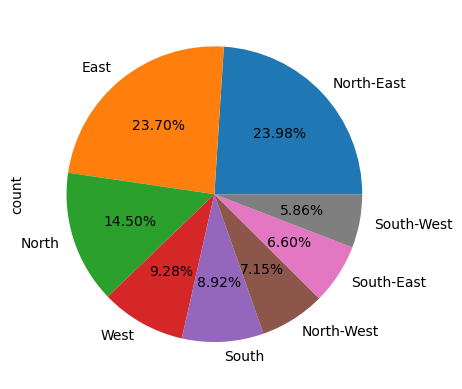

In [68]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [69]:
df.shape

(3555, 19)

In [70]:
df.shape[0]

3555

In [71]:
1011/df.shape[0]

0.2843881856540084

In [72]:
df.drop(columns=['facing'],inplace=True)

So I think a lot to fill these missing values , also there is certain doubt how much this column useful in analysis, so I took decision to drop this column.

In [73]:
df.sample(5)

property_type                       society      sector  price  \
1525          flat        vatika lifestyle homes   sector 83   1.15   
353           flat       shree vardhman victoria   sector 70   1.65   
2108          flat          dlf new town heights   sector 90   2.00   
1524         house  sushant lok 1 builder floors   sector 43  13.00   
2777          flat                ats tourmaline  sector 109   2.95   

      price_per_sqft  bedRoom  bathroom balcony  floorNum   agePossession  \
1525          6553.0        3         2       3      15.0  Relatively New   
353           8462.0        3         4       3       5.0  Relatively New   
2108          7334.0        4         4      3+      20.0  Moderately Old   
1524         48148.0        3         3      3+       4.0    New Property   
2777          9365.0        4         5      3+      10.0  Relatively New   

      built_up_area  study room  servant room  store room  pooja room  others  \
1525         1588.0           0             0           0           0       0   
353          1527.0           0             1           0           0       1   
2108         2468.0           0             1           0           0       1   
1524         2700.0           0             0           0           1       0   
2777         2851.0           0             1           0           0       0   

      furnishing_type  luxury_score  
1525                0            37  
353                 2            49  
2108                0            49  
1524                2             7  
2777                0           101

In [74]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score'],
      dtype='object')

In [75]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

- Identified 1011 missing values in the "facing" column.

- Checked the distribution of categories within the "facing" column to understand the data distribution.

- Realized that the missing values constitute approximately 28% of the total data (3555 rows).

- Contemplated on potential methods to impute these missing values but also questioned the overall utility of this column in the analysis.

- Decided to drop the "facing" column due to the substantial percentage of missing values and uncertainty about its analytical significance.

In [76]:
df[df['society'].isnull()]

property_type society     sector  price  price_per_sqft  bedRoom  \
3293          flat     NaN  sector 78    0.6          3692.0        2   

      bathroom balcony  floorNum       agePossession  built_up_area  \
3293         2       0       2.0  Under Construction         1625.0   

      study room  servant room  store room  pooja room  others  \
3293           0             0           0           0       0   

      furnishing_type  luxury_score  
3293                0             0

In [77]:
df.drop(index=[3293],inplace=True)

In [78]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

# Age possession

In [79]:
df['agePossession'].value_counts()

agePossession
Relatively New        1606
New Property           557
Moderately Old         545
Old Property           292
Undefined              291
Under Construction     263
Name: count, dtype: int64

In age possession "undefined" categories will treated as "missing values"
So for this category ask two question "in which sector this property", and "what is the property type"
Then in entire data find all those rows and property type where information is same, and then extract "MODE" for all those rows.
And replace undefined with mode values.


In [80]:
df[df['agePossession'] == 'Undefined']

property_type                                  society  \
26           house                    vatika sovereign next   
38            flat     shapoorji pallonji joyville gurugram   
52            flat                        satya element one   
92            flat                             essel towers   
107           flat          signature global orchard avenue   
110           flat                  sidhartha ncr one phase   
124           flat                       godrej nature plus   
141           flat                         smart world gems   
162          house                              independent   
163           flat                       ambience caitriona   
167           flat                        conscient elevate   
171           flat                     housing apna enclave   
185          house                               raj villas   
205          house                              independent   
219           flat                    czar mahira homes 63a   
224           flat                        sidhartha ncr one   
230           flat                         smart world gems   
258           flat                 pareena coban residences   
279           flat                        hcbs sports ville   
309           flat                              the serenas   
311          house                               sobha city   
314          house                              independent   
317          house                              independent   
323           flat                              m3m skycity   
329          house                           ats tourmaline   
336           flat                             senate court   
343          house                              independent   
345           flat                              m3m heights   
347          house                       bhim nagar society   
350           flat                       umang winter hills   
366           flat                  signature global solera   
373           flat               ramprastha the edge towers   
377          house                              independent   
378           flat                          ramsons kshitij   
388          house                              independent   
409           flat                    sapphire eighty three   
443          house                              vipul world   
454          house                              independent   
462           flat              ansal housing highland park   
463          house                              independent   
469           flat           ramson kshitij sec-95 gurugram   
471          house                        ansal api esencia   
476          house                              independent   
481           flat                             essel towers   
489           flat                               godrej air   
511          house                              independent   
518           flat                           avl 36 gurgaon   
527           flat                 signature global city 81   
543           flat                            ashiana anmol   
544          house                       ansals palam vihar   
547           flat                              spaze privy   
553          house                              greenopolis   
558           flat                              m3m capital   
565           flat                      trisara our homes 3   
573          house                              independent   
580           flat                              m3m skywalk   
581          house                              independent   
597          house                              independent   
631          house                              independent   
640           flat                          ansal height 86   
646          house                              independent   
650           flat                          ramsons kshitij   
668          house                  

In [81]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

#### Explanation of mode_based_imputation function :

In this function, the mode value for the "agePossession" column is calculated based on certain conditions. Here's a simple explanation:

##### Condition Check:

• If the "agePossession" value for a specific row is 'Undefined', it implies that the value needs to be imputed.

• If the value is already present (not 'Undefined'), then it returns the existing value without any changes.

##### Mode Calculation:

• For rows where "agePossession" is 'Undefined', it calculates the mode value based on specific criteria:

○ The criteria include the same "sector" and "property_type" as the current row.

○ It looks at the entire dataset (df) but filters rows based on the sector and property type.

○ The mode() function is used to find the most frequently occurring value in the specified subset.
 
 ##### Handling Empty Mode:
• If the mode value is empty (no mode found), it means there's no clear majority value in the subset.

• In such cases, the function returns NaN, indicating that no suitable mode could be determined.

• If a mode is found, it returns the first element of the mode (using iloc[0]).

##### Final Result:

• The function returns the calculated mode value if the row originally had 'Undefined' in the "agePossession" column.

• If the original value was not 'Undefined', it returns the existing value without any changes.
In summary, this function helps impute missing or 'Undefined' values in the "agePossession" column by calculating the mode based on the sector and property type of the current row

In [82]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [83]:
df['agePossession'].value_counts()

agePossession
Relatively New        1718
New Property           597
Moderately Old         584
Old Property           325
Under Construction     277
Undefined               53
Name: count, dtype: int64

In [84]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [85]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [86]:
df['agePossession'].value_counts()

agePossession
Relatively New        1727
New Property           598
Moderately Old         591
Old Property           328
Under Construction     277
Undefined               33
Name: count, dtype: int64

- New or old property can depend upon sector as sector based upon new and old area basis.
- Then second time 55 rows still remain undefined which apply mode based upon sector and after this 33 rows still remain so again apply mode based upon only property type and filled undefined value.


In [87]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [88]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [89]:
df['agePossession'].value_counts()

agePossession
Relatively New        1729
Moderately Old         622
New Property           598
Old Property           328
Under Construction     277
Name: count, dtype: int64

In [90]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

- Treat "undefined" in the "agePossession" column as missing values.
- For each row with "undefined" in "agePossession," identify the sector and property type of the property.
- Find all rows in the dataset where the sector and property type match the values from the current row.
- Calculate the mode of the "agePossession" column for the subset of data with matching sector and property type.
- Replace the "undefined" value in the current row with the calculated mode.
- Repeat this process for rows that still have "undefined" values.
- Additionally, consider that the age of a property can be influenced by the sector (new or old area).
- After these iterations, if some rows still have "undefined" values, apply mode imputation based on sector and property type, and then property type alone to fill the remaining missing values.


In [91]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score'],
      dtype='object')

In [92]:
df.shape

(3554, 18)

In [94]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)